In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical

## Load and Preprocess the Data

In [26]:
with np.load("Datasets\\mnist.npz") as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

In [27]:
type(x_train)

numpy.ndarray

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
img_1 = x_train[0]
x_train[500].shape

(28, 28)

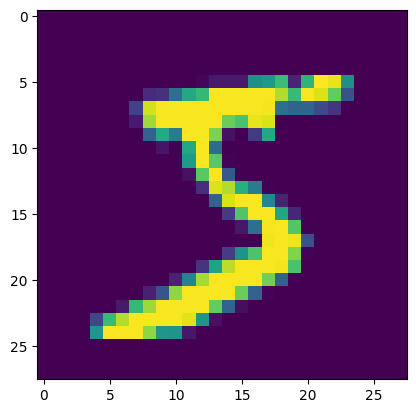

In [30]:
import matplotlib.pyplot as plt
plt.imshow(img_1)

## Normalization 

In [31]:
# Normalize the images to a pixel value range of 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [32]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [33]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [34]:
y_train.shape

(60000, 10)

## Function Utils

## Plot Loss Curves

In [ ]:
# PLot the validation and training curvees seperately
def plot_loss_curves(history):
  """
  Returns seperate Loss curves for training and validation metrics
  """
  loss= history.history["loss"]
  val_loss= history.history["val_loss"]

  accuracy= history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # PLot Loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # PLot accuracy
  plt.figure() # Create a new figure
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

### Evaluate Model

In [46]:
def pred_plot(model, x_test):
    # 1. Select 50 random images from the test set
    num_images = 50
    random_indices = np.random.choice(x_test.shape[0], num_images, replace=False)
    test_images = x_test[random_indices]
    true_labels = np.argmax(y_test[random_indices], axis=1)

    # 2. Predict the labels for these images
    predicted_labels = np.argmax(model.predict(test_images), axis=1)

    # 3. Plot the images with their predicted and true labels
    plt.figure(figsize=(20, 10))
    rows = num_images // 10
    for i in range(num_images):
        plt.subplot(rows, 10, i + 1)
        plt.imshow(test_images[i], cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

## Define the Model

### 2. Previously we Built the Model using Dense layers

`model = Sequential()`

`model.add(Flatten(input_shape=(28, 28)))`

`model.add(Dense(512, activation='relu'))`

`model.add(Dense(256, activation='relu'))`

`model.add(Dense(10, activation='softmax'))`

## Build the Model

### Model 1

In [35]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="relu", input_shape=(28, 28)),
    tf.keras.layers.Conv1D(10, 3, activation="relu"),
    tf.keras.layers.Conv1D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

c:\Abdul Saboor\Programing\Virtual Enviroments\NLPvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model_1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 26, 10)         │           850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 24, 10)         │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 22, 10)         │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 220)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,680 (14.38 KB)

 Trainable params: 3,680 (14.38 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [37]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [38]:
history_1 = model_1.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7709 - loss: 0.7156 - val_accuracy: 0.9473 - val_loss: 0.1781
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9478 - loss: 0.1749 - val_accuracy: 0.9597 - val_loss: 0.1391
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9609 - loss: 0.1325 - val_accuracy: 0.9642 - val_loss: 0.1119
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9651 - loss: 0.1151 - val_accuracy: 0.9724 - val_loss: 0.0914
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9696 - loss: 0.0994 - val_accuracy: 0.9704 - val_loss: 0.0940


#### PLoting Loss Curves

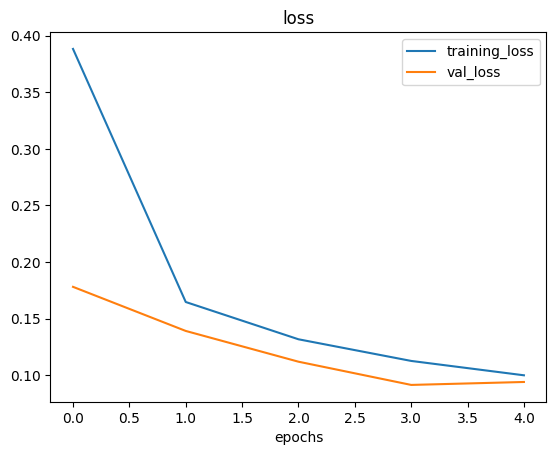

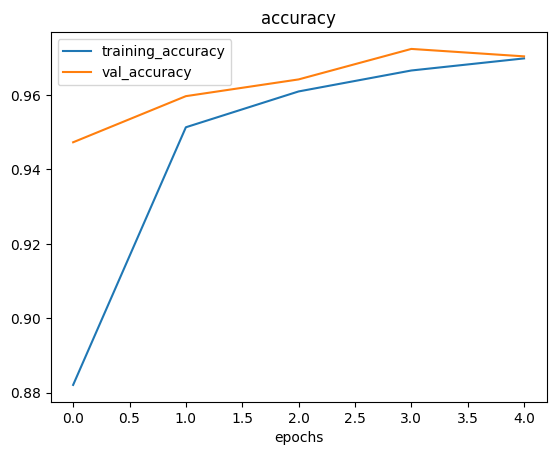

In [41]:
plot_loss_curves(history_1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


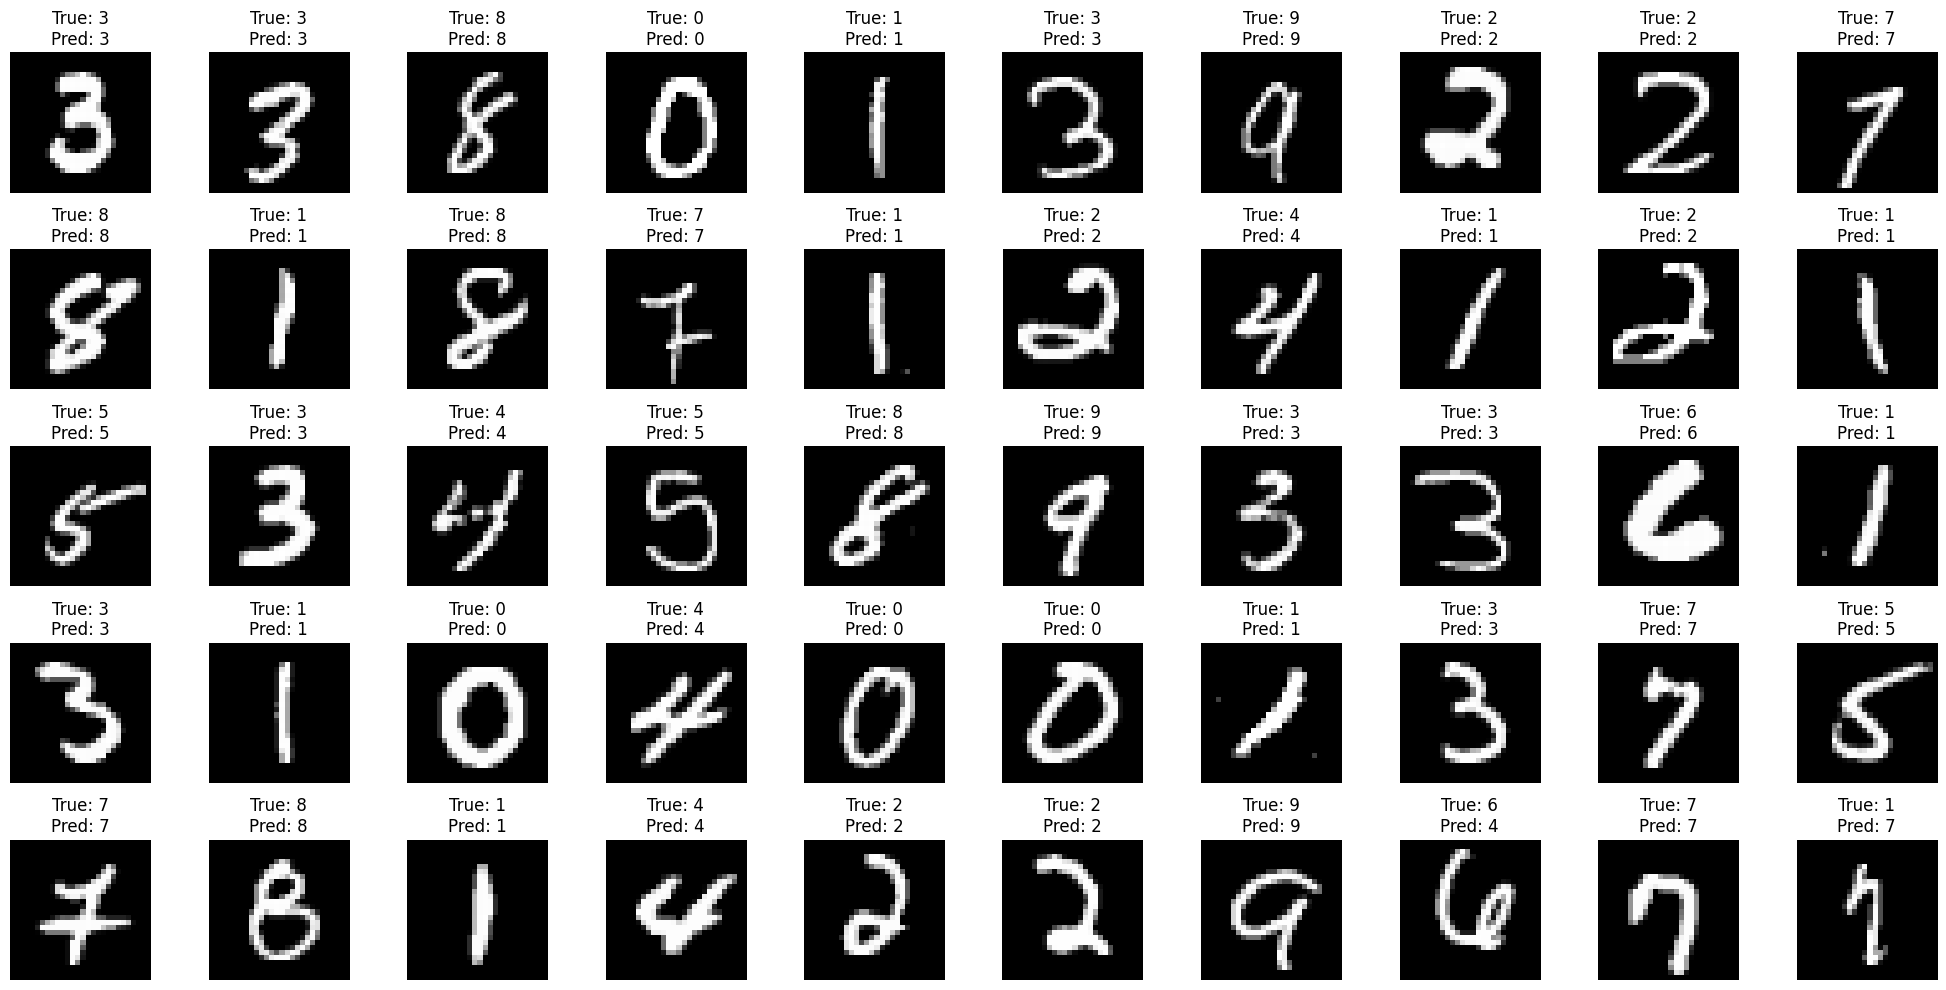

In [43]:
pred_plot(model_1, x_test)

### Model 2

In [20]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(28, 28,1)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

c:\Abdul Saboor\Programing\Virtual Enviroments\NLPvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 22, 22, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        48,410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,992 (589.82 KB)

 Trainable params: 50,330 (196.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 100,662 (393.21 KB)

In [21]:
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [22]:
history_2 = model_2.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8833 - loss: 0.5240 - val_accuracy: 0.9765 - val_loss: 0.0730
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9813 - loss: 0.0629 - val_accuracy: 0.9709 - val_loss: 0.1026
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9862 - loss: 0.0418 - val_accuracy: 0.9799 - val_loss: 0.0735
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9912 - loss: 0.0271 - val_accuracy: 0.9797 - val_loss: 0.0786
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9929 - loss: 0.0230 - val_accuracy: 0.9783 - val_loss: 0.0852


#### Ploting Loss Curves

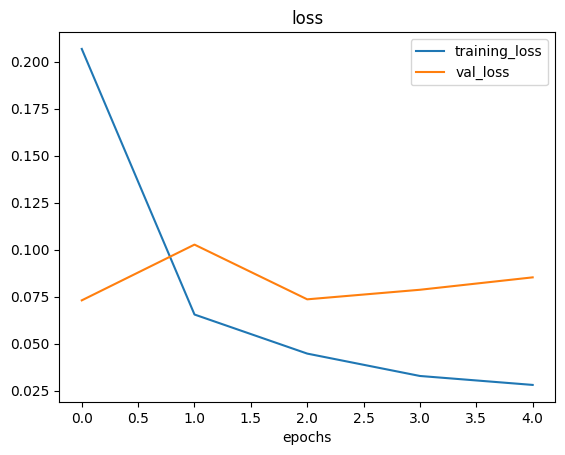

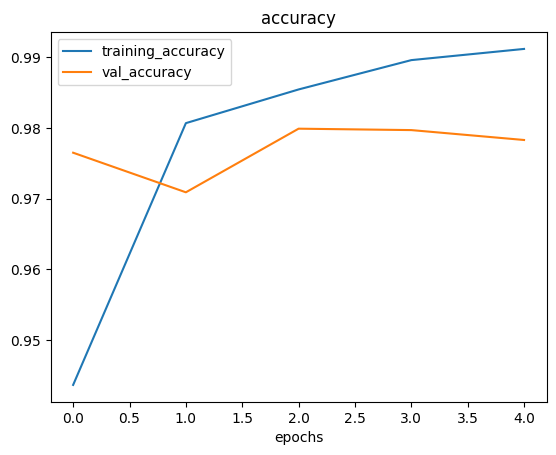

In [42]:
plot_loss_curves(history_2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


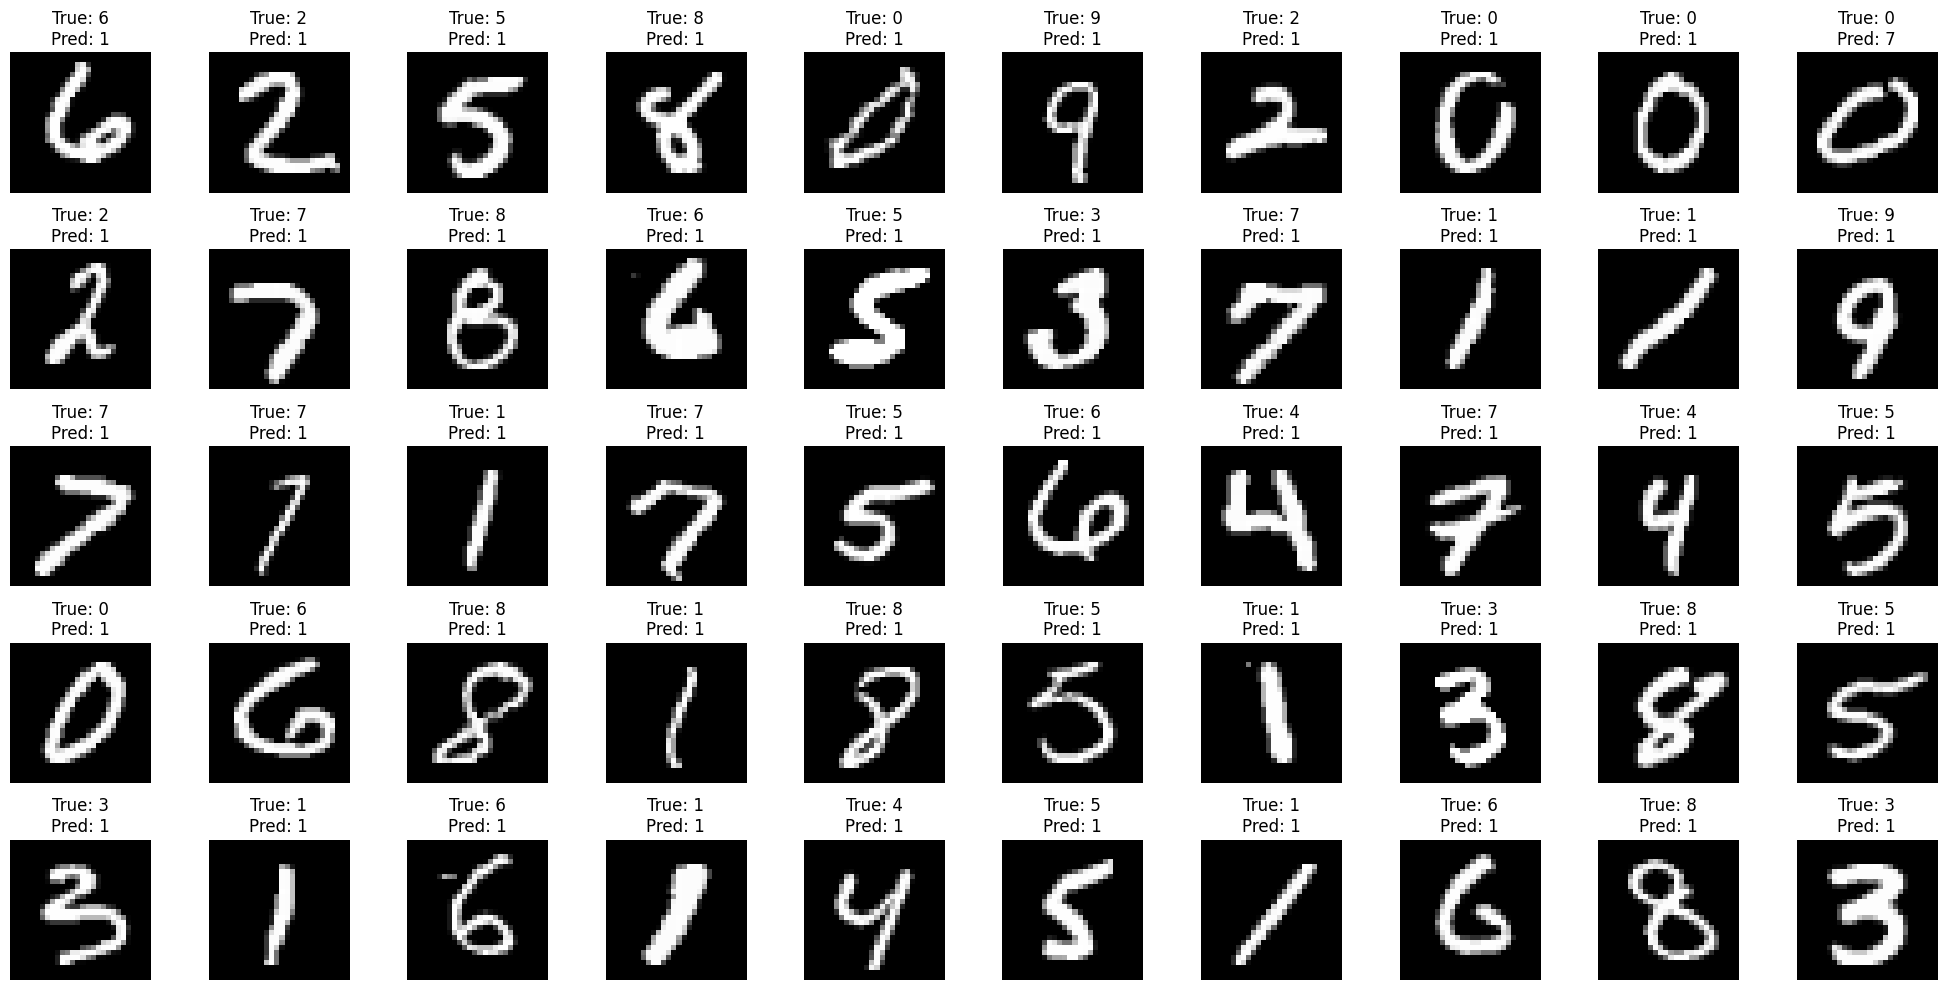

In [44]:
pred_plot(model_2, x_test)